In [2]:
# Change in the masses of the PBHs due to accretion in radiation domination to 
# z_eq, post PBH formation.



%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
from module2 import *
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 

π = np.pi
Ω_cdm = 0.85
G = 6.67e-11                # in units of m^3⋅kg^−1⋅s^−2
M_solar = 1.989e30          # in units of kg
A = 1.495e11                # Astronomical unit
pc = 3.085e16               # in unist of meter. 
Λ = 2.036e-35               # in units of s⁻2
c = 3e8                     # in units of ms⁻¹
yr = 3.154e7                # in units of seconds
t_m = 13.78e9 * yr          #in units of yrs corresponding to t_0=13.78Gyr
t_eq = 1.5923e12            # in units of seconds
ρ_eq = 2.1548e-16           # in units of kg m^-3
ρ_meq = ρ_eq/2              # in units of kg m^-3
σ_eq = 0.005
a_eq = 2.9374e-4
M_H_eq = 3.1e16             #Horizon mass at z_eq in units of solar mass,





bin_centres = np.geomspace(1e4, 1e-4, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, 6)
m_2 = np.geomspace(1e4, 1e-4, 6)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 


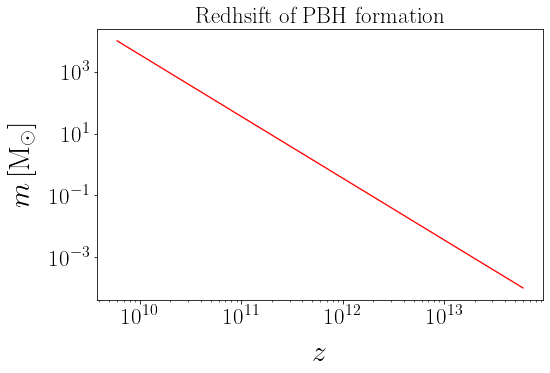

In [3]:
# Redshift at which the PBH formation takes place


z_i_list = np.zeros(len(m_1_list))
for i, m in enumerate(m_1_list):
    z_i_list[i] = z_pbh(m)


fig, ax = plt.subplots(1, figsize = (8, 5))
plt.rc('lines', linewidth = 1.3)

plt.loglog(z_i_list, m_1_list,'r')

plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$m\, [\mathrm{M_{\odot}}]$',fontsize = 29.5, labelpad = 12)
plt.title('Redhsift of PBH formation', fontsize = 23, pad = 6)
plt.savefig('m_pbh_zi.pdf', bbox_inches = 'tight')
plt.show()

In [3]:
# So, this plot shows that the smaller PBHs form first at high redshift which is 
# true as right after the Big Bang during expansion, the smaller regions can get easily 
# squeezed in density cpllapse however, for larger PBHs the spacial scale is larger 
# which has to match the the cosmological horizon, which can happen once the expansion
# has stopped.


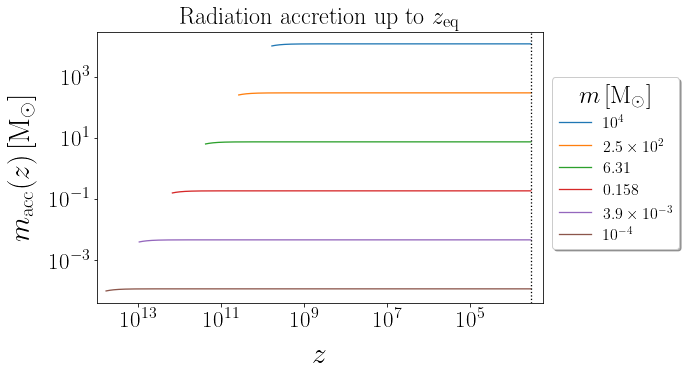

In [4]:
#Accretion of radiation around the PBH as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.

# v<< c_s


def m_racc(m, z):
    c_s  = c/np.sqrt(3)
    α = ((4 * π * (G**2))/(c_s**3)) * (((8 * π * ρ_r0 * G)/3)**(-1/2)) 
    first_term  = (α/2) *  ρ_r0  * (z - z_i) * (z + z_i + 2) 
    second_term = 1/m
    return (1/(first_term + second_term))
    

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    z_i = z_pbh(m)
    z = np.geomspace(z_pbh(m), z_eq, 100000)
    z_list = z.tolist()
    m_racc_list = np.zeros(len(z_list))
    m*= M_solar
    for j, z in enumerate(z_list):
        m_racc_list[j] = m_racc(m, z) 
    ax.loglog(z_list, m_racc_list/M_solar, color = color)
    

plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$m_\mathrm{acc}(z) \, [\mathrm{M_{\odot}}]$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e14, z_eq/2)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

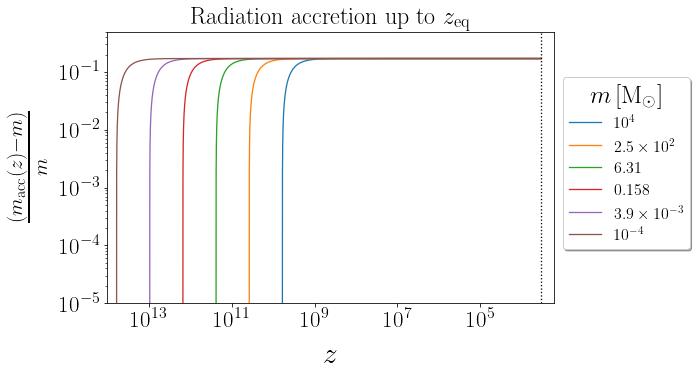

In [5]:
# Fractional change in the mass of the PBH due to radiation accretion upto z_eq.

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    z_i = z_pbh(m)
    z = np.geomspace(z_pbh(m), z_eq, 100000)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    m*= M_solar
    for j, z in enumerate(z_list): 
        m_change_list[j] = (m_racc(m, z) - m )/m  
    ax.loglog(z_list, m_change_list, color = color) 
    
  
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_\mathrm{acc}(z) - m)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e14, z_eq/2)
plt.ylim(1e-5, 0.5)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('raccΔ.pdf', bbox_inches = 'tight')
plt.show()

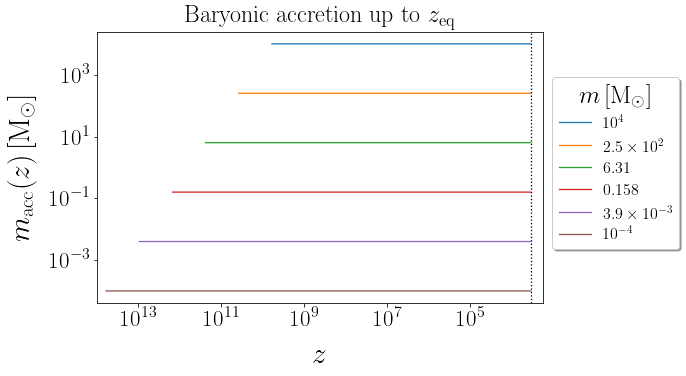

In [6]:
#Accretion of baronic matter/gas around the PBH as per ρ = ρ_b,0 (1 + z)³ up to z_eq.
# v<< c_s


def m_bacc(m, z):
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * (((8 * π * ρ_r0 * G)/3)**(-1/2)) 
    first_term  = α *  ρ_b0  * (z - z_i) 
    second_term = 1/m
    return (1/(first_term + second_term))
    
    

fig, ax = plt.subplots(1, figsize = (8, 5))

for i, m in enumerate(m_1_list):
    z_i = z_pbh(m)
    z = np.geomspace(z_pbh(m), z_eq, 100000)
    z_list = z.tolist()
    m_bacc_list = np.zeros(len(z_list))
    m_change_list = np.zeros(len(z_list))
    m*= M_solar
    for j, z in enumerate(z_list):
        m_bacc_list[j] =  m_bacc(m, z)
    ax.loglog(z_list, m_bacc_list/M_solar, '')    
    
    
    

plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$m_\mathrm{acc}(z) \, [\mathrm{M_{\odot}}]$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.title('Baryonic accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.xlim(1e14, z_eq/2)
#plt.savefig('bacc.pdf', bbox_inches = 'tight')
plt.show()

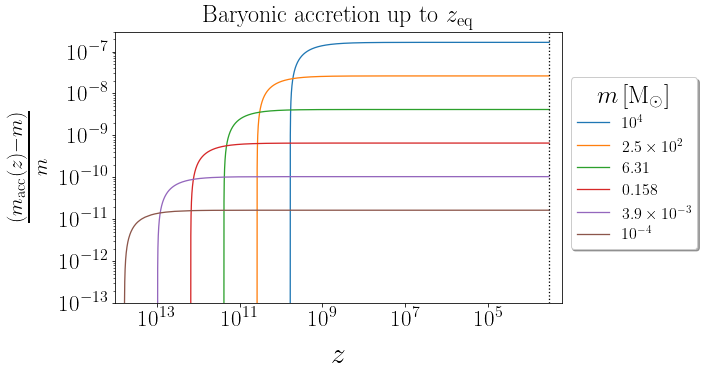

In [7]:
#Fractional change in the mass of the PBH due to Baryon accretion upto z_eq.

fig, ax = plt.subplots(1, figsize = (8, 5))
for i, m in enumerate(m_1_list):
    z_i = z_pbh(m)
    z = np.geomspace(z_pbh(m), z_eq, 100000)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    m*= M_solar
    for j, z in enumerate(z_list):
        m_change_list[j] =  (m_bacc(m, z) - m)/m
    ax.loglog(z_list, m_change_list, '')    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')

plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_\mathrm{acc}(z) - m)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.title('Baryonic accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.xlim(1e14, z_eq/2)
plt.ylim(1e-13, 3e-7)
plt.savefig('baccΔ.pdf', bbox_inches = 'tight')
plt.show()

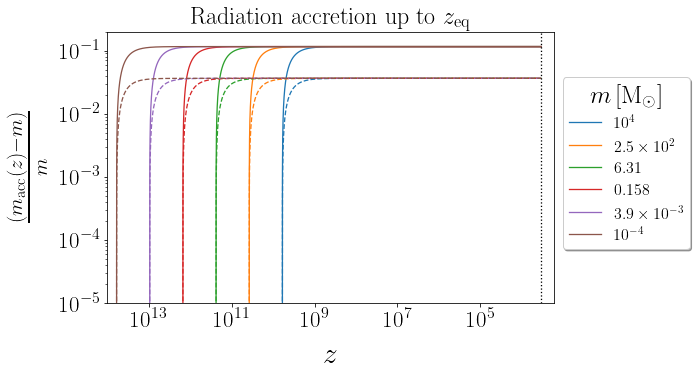

In [8]:
# Comparison of radiation accretion in radiation domination with 
# https://arxiv.org/pdf/2208.04197.pdf.




t_1 = 2.1e12
t_2 = 2.4e17
t_0 = t_m

ρ_c0 = 9.2e-27     #in units of kgm⁻³
Ω_r0 = 4.4e-5
Ω_m0 = 0.04
ρ_r0 = Ω_r0 * ρ_c0
ρ_b0 = Ω_m0 * ρ_c0
H_0 = np.sqrt((8 * π * G * ρ_c0)/3)
η_acc = 0.1



def m_racc_tabashi(m, z):
    c_s  = c/np.sqrt(3)
    C = (t_1**(-1/2)) * ((t_1/t_2)**(2/3)) * (np.exp(H_0 * (t_2 - t_0)))
    k = ((16 * π * (G**2))/(c_s**3)) *  (C**2)  
    first_term  = k *  η_acc * ρ_r0 * (t_1**(-2/3)) * (t_2**(8/3)) * (np.exp(-4 * H_0 *(t_2 -t_0))) * (z - z_i) * (z + z_i + 2) 
    second_term = 1/m
    return (1/(first_term + second_term))
    

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    z_i = z_pbh(m)
    z = np.geomspace(z_pbh(m), z_eq, 100000)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    m*= M_solar
    for j, z in enumerate(z_list): 
        m_change_list[j] = (m_racc(m, z) - m )/m  
    ax.loglog(z_list, m_change_list, color = color) 
    
    
for i, (m, color) in enumerate(zip(m_1_list, colors)):
    z_i = z_pbh(m)
    z = np.geomspace(z_pbh(m), z_eq, 100000)
    z_list = z.tolist()
    m_change_tabashi_list = np.zeros(len(z_list))
    m*= M_solar
    for j, z in enumerate(z_list): 
        m_change_tabashi_list[j] = (m_racc_tabashi(m, z) - m )/m  
    ax.loglog(z_list, m_change_tabashi_list, color = color, linestyle = '--') 
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_\mathrm{acc}(z) - m)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e14, z_eq/2)
plt.ylim(1e-5, 0.2)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('raccΔ_Tabashi.pdf', bbox_inches = 'tight')
plt.show()

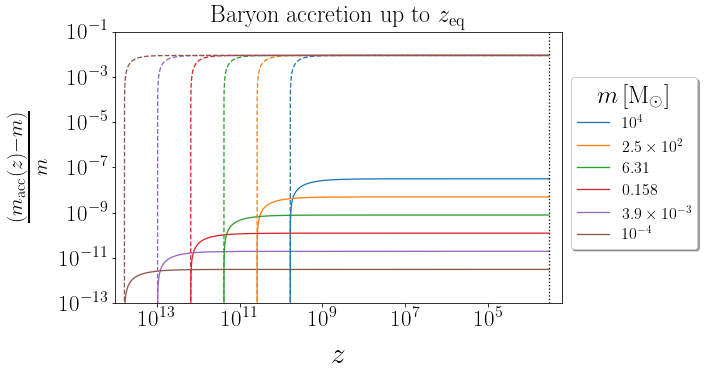

In [14]:
# Comparison of matter accretion in radiation domination with 
# https://arxiv.org/pdf/2208.04197.pdf.



def m_bacc_tabashi(m, z):
    c_s  = c/np.sqrt(3)
    C = (t_1**(-1/2)) * ((t_1/t_2)**(2/3)) * (np.exp(H_0 * (t_2 - t_0)))
    k = ((16 * π * (G**2))/(c_s**3)) *  (C**2)
    first_term  = k *  η_acc * ρ_b0 * (t_2**2) * (np.exp(-3 * H_0 *(t_2 -t_0))) *  (z - z_i) * (z + z_i + 2)  
    second_term = 1/m
    return (1/(first_term + second_term))
  
    
    

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    z_i = z_pbh(m)
    z = np.geomspace(z_pbh(m), z_eq, 100000)
    z_list = z.tolist()
    m_change_list = np.zeros(len(z_list))
    m*= M_solar
    for j, z in enumerate(z_list): 
        m_change_list[j] = (m_bacc(m, z) - m )/m  
    ax.loglog(z_list, m_change_list, color = color) 
    
    
for i, (m, color) in enumerate(zip(m_1_list, colors)):
    z_i = z_pbh(m)
    z = np.geomspace(z_pbh(m), z_eq, 100000)
    z_list = z.tolist()
    m_change_tabashi_list = np.zeros(len(z_list))
    m*= M_solar
    for j, z in enumerate(z_list): 
        m_change_tabashi_list[j] = (m_bacc_tabashi(m, z) - m )/m  
    ax.loglog(z_list, m_change_tabashi_list, color = color, linestyle = '--') 
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_\mathrm{acc}(z) - m)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e14, z_eq/2)
plt.ylim(1e-13, 0.1)
plt.title('Baryon accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('baccΔ_Tabashi.pdf', bbox_inches = 'tight')
plt.show()